In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from attrition_prediction.data_processing.processing_io import ReadAttritionDataFromCSV
%matplotlib inline

In [5]:
def display_n_rows_from_df(data_pd_df, num_rows):
    with pd.option_context('display.min_rows', num_rows, 'display.max_rows', num_rows, 'display.max_columns', None):
        display(data_pd_df.head(num_rows))
    print(f'Displayed rows: {num_rows}/{len(data_pd_df)}. Columns: {len(data_pd_df.columns)}')

In [6]:
data_str_path = '/Users/aponcedeleonch/Documents/WorkApplications/Crayon/employee-attrition.csv'
data_pd_df = ReadAttritionDataFromCSV(data_str_path).process()
display_n_rows_from_df(data_pd_df, 10)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2
5,32,No,Travel_Frequently,1005,Research & Development,2,2,Life Sciences,4,Male,79,3,1,Laboratory Technician,4,Single,3068,11864,0,Y,No,13,3,3,80,0,8,2,2,7,7,3,6
6,59,No,Travel_Rarely,1324,Research & Development,3,3,Medical,3,Female,81,4,1,Laboratory Technician,1,Married,2670,9964,4,Y,Yes,20,4,1,80,3,12,3,2,1,0,0,0
7,30,No,Travel_Rarely,1358,Research & Development,24,1,Life Sciences,4,Male,67,3,1,Laboratory Technician,3,Divorced,2693,13335,1,Y,No,22,4,2,80,1,1,2,3,1,0,0,0
8,38,No,Travel_Frequently,216,Research & Development,23,3,Life Sciences,4,Male,44,2,3,Manufacturing Director,3,Single,9526,8787,0,Y,No,21,4,2,80,0,10,2,3,9,7,1,8
9,36,No,Travel_Rarely,1299,Research & Development,27,3,Medical,3,Male,94,3,2,Healthcare Representative,3,Married,5237,16577,6,Y,No,13,3,2,80,2,17,3,2,7,7,7,7


Displayed rows: 10/1470. Columns: 33


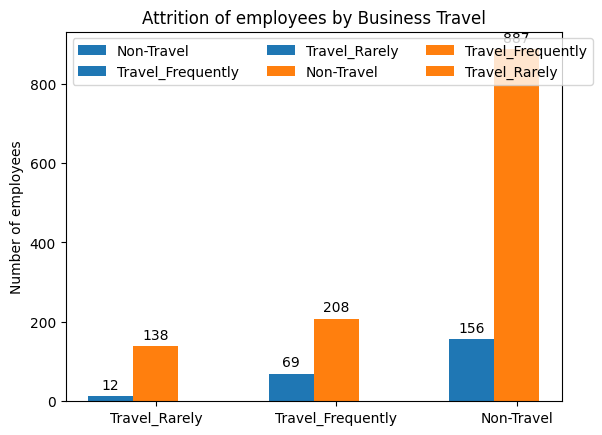

In [17]:
def plot_business_travel(data_pd_df):
    fig, ax = plt.subplots()

    attrition_status = list(pd.unique(data_pd_df['Attrition']))
    categories = list(pd.unique(data_pd_df['BusinessTravel']))
    x = np.arange(len(categories))
    width = 0.25  # the width of the bars
    multiplier = 0
    for status in attrition_status:
        offset = width * multiplier
        data_from_status = data_pd_df.loc[data_pd_df['Attrition'] == status]
        data_to_plot = data_from_status.groupby('BusinessTravel').size()
        values = data_to_plot.to_numpy()
        # labels = list(data_to_plot.index)
        rects = ax.bar(x + offset, data_to_plot, width, label=status)
        ax.bar_label(rects, padding=3)
        multiplier += 1

    # Add some text for labels, title and custom x-axis tick labels, etc.
    ax.set_ylabel('Number of employees')
    ax.set_title('Attrition of employees by Business Travel')
    ax.set_xticks(x + width, categories)
    ax.legend(loc='upper left', ncols=3)
    # ax.set_ylim(0, 250)

    return fig

plot_business_travel(data_pd_df)
plt.show()